# Efeito dos outliers
MAE, MSE, RMSE

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Funções

In [2]:
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
        mae += abs(i-ref)
        c += 1
    return mae / c

In [3]:
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
        mse += (i-ref)**2
        c += 1
    return mse / c

In [4]:
def rmse(data, ref):
    return (mse(data, ref))**(1/2)

### Parâmetros

In [5]:
qtd_conjuntos = 1000
qtd_pontos = 1000

### Preparação dos conjuntos

In [6]:
# Gera x conjuntos com y pontos
dados = np.random.normal(100, 20, (qtd_conjuntos, qtd_pontos))

### Cálculo das métricas

In [7]:
def evaluate_metrics(qtd_outliers, amplitude_outliers):
    
    # Em cada conjunto, sorteia 10 números entre 0 e qtd_pontos
    noise = np.random.uniform(0, qtd_pontos, (qtd_conjuntos, qtd_outliers))
    
    # Listas para guardar as métricas das distribuições originais
    mae_original = []
    mse_original = []
    rmse_original = []
    
    # Listas para guardar as métricas das distribuições com outliers
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # Para cada conjunto, calcula as distâncias em relação à média
    for i in range(dados.shape[0]):
        
        # Recupera o conjunto
        conjunto = dados[i]
        
        # Cria uma versão dos dados com outliers
        outliers = [int(i) for i in noise[i]]
        conjunto_noisy = []
        c  = 0
        for x in conjunto:
            if c in outliers:
                conjunto_noisy.append(x * amplitude_outliers)
            else:
                conjunto_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases,
        # to prevent it from shifting and altering the result.
        media = np.mean(conjunto)
        
        # Calcula as métricas
        mae_original.append(mae(conjunto, conjunto))
        mse_original.append(mse(conjunto, conjunto))
        rmse_original.append(rmse(conjunto, conjunto))
        mae_noisy.append(mae(conjunto_noisy, conjunto))
        mse_noisy.append(mse(conjunto_noisy, conjunto))
        rmse_noisy.append(rmse(conjunto_noisy, conjunto))
        
    # Plota tudo
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    kde = True
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = kde, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = kde)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = kde, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = kde)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = kde, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = kde)
    ax1.legend(["Original", "Com ruído"], loc = 'lower right')
    ax2.legend(["Original", "Com ruído"], loc = 'lower right')
    ax3.legend(["Original", "Com ruído"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()
    
    # Calcula a distância entre as médias das distribuições
    print("A distância entre as médias das distribuições MAE é de: {:.2f}".format(np.mean(mae_noisy) - np.mean(mae_original)))
    print("A distância entre as médias das distribuições MSE é de: {:.2f}".format(np.mean(mse_noisy) - np.mean(mse_original)))
    print("A distância entre as médias das distribuições RMSE é de: {:.2f}".format(np.mean(rmse_noisy) - np.mean(rmse_original)))
    print("")

### Compara os casos

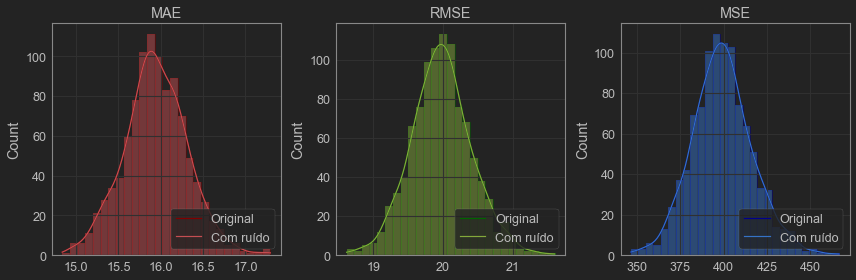

In [8]:
evaluate_metrics(qtd_outliers = 0, amplitude_outliers = 1)

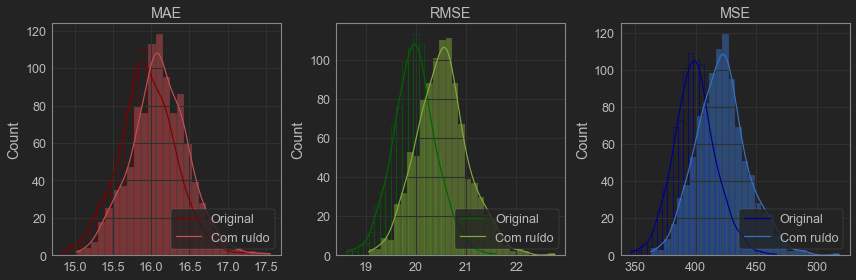

In [9]:
evaluate_metrics(qtd_outliers = 2, amplitude_outliers = 2)

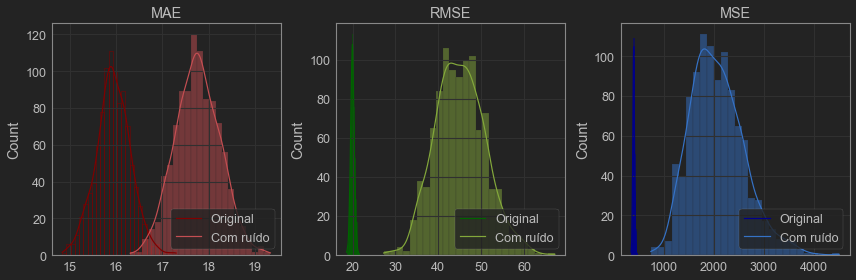

In [10]:
evaluate_metrics(qtd_outliers = 2, amplitude_outliers = 10)

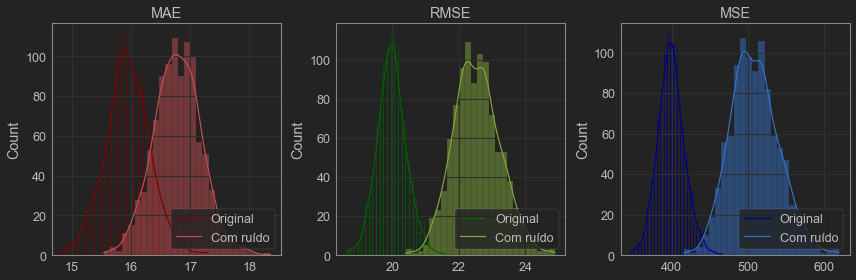

In [11]:
evaluate_metrics(qtd_outliers = 10, amplitude_outliers = 2)

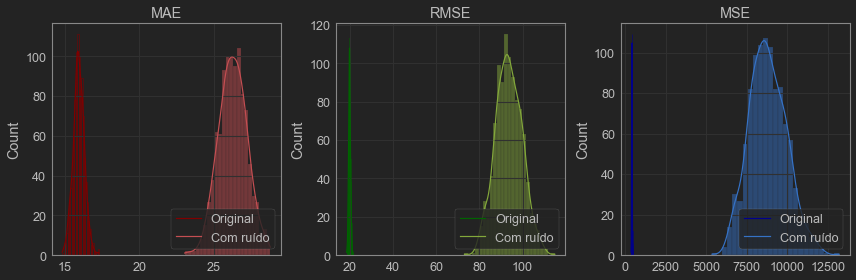

In [12]:
evaluate_metrics(qtd_outliers = 10, amplitude_outliers = 10)

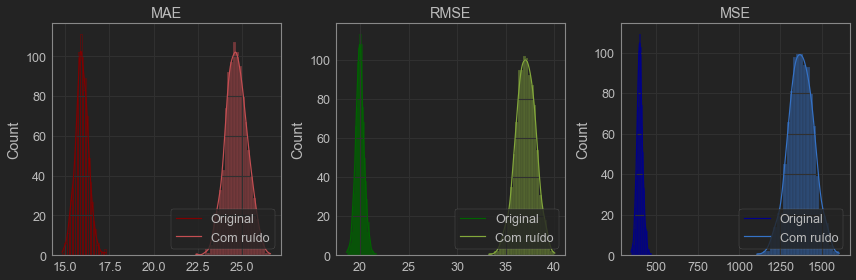

In [13]:
evaluate_metrics(qtd_outliers = 100, amplitude_outliers = 2)

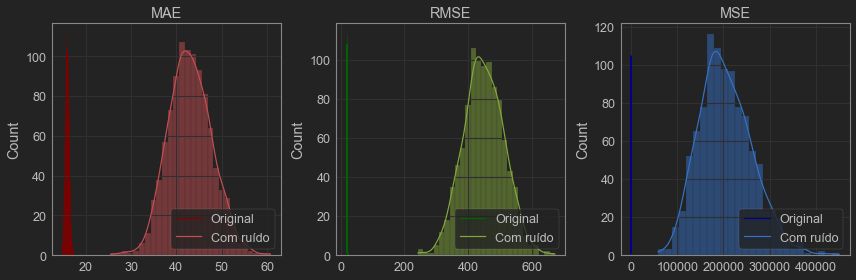

In [14]:
evaluate_metrics(qtd_outliers = 2, amplitude_outliers = 100)